# SPAM EMAIL DETECTION


DATASET : https://www.kaggle.com/datasets/venky73/spam-mails-dataset

### IMPORTING LIBRARIES and DATASET

In [1]:
import numpy as np # numerical computing, array operations, multi-D arrays, mathematical & logical operations
import pandas as pd # data manupulation and analysis, works with structured data
from sklearn.model_selection import train_test_split # sklearn-Ml tasks such as classification, regression
                                                     # train_test - used in ML tasks to predict the unseen data
from sklearn.feature_extraction.text import TfidfVectorizer  # feature extraction used in NLP and Data Mining tasks 
                                                             # transforms text document into numerical representation for ML to work with.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # commonly used to measure the performance of the model

import seaborn as sns  # used for confusion matrix representation
import matplotlib.pyplot as plt  # plotting of matrix

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#df = pd.read_csv('D:\\PROJECTS\\CodersCave Dec15-Jan15\\Email Spam Detection\\emails.csv')
df = pd.read_csv('D:\\PROJECTS\\CodersCave Dec15-Jan15\\Email Spam Detection\\spam_EMAIL_dataset.csv')

### UNDERSTANDING THE DATA

In [3]:
print(df)

      Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1             0  
2             0  
3  

In [4]:
data = df.where((pd.notnull(df)), '')  #

In [5]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [7]:
data.shape

(5171, 4)

### SPLITTING THE DATA INTO TRAINING AND TESTING SETS

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label_num'], test_size=0.2, random_state=42)

In [9]:

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # You can adjust the max_features parameter

In [10]:
# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## 1. LOGISTIC REGRESSION

In [11]:
# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [12]:
# Make predictions on the testing set 
predictions = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Make predictions on the training set
train_predictions = model.predict(X_train_tfidf)

# Make predictions on the testing set
test_predictions = model.predict(X_test_tfidf)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate the model on the testing set
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Accuracy: 0.9864734299516909
Training Accuracy: 0.995164410058027
Testing Accuracy: 0.9864734299516909


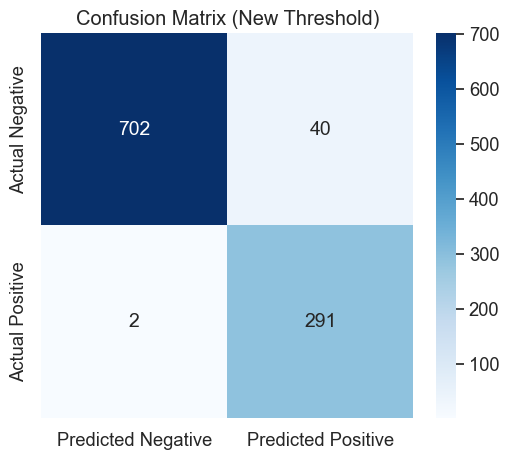

Confusion Matrix (New Threshold):
 [[702  40]
 [  2 291]]

Classification Report (New Threshold):
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       742
           1       0.88      0.99      0.93       293

    accuracy                           0.96      1035
   macro avg       0.94      0.97      0.95      1035
weighted avg       0.96      0.96      0.96      1035



In [13]:
# Get predicted probabilities for each class
proba_predictions = model.predict_proba(X_test_tfidf)

# Set a new threshold (adjust as needed)
new_threshold = 0.3

# Classify based on the new threshold
new_predictions = (proba_predictions[:, 1] > new_threshold).astype(int)

# Evaluate the model with the new predictions
new_conf_matrix = confusion_matrix(y_test, new_predictions)
new_classification_rep = classification_report(y_test, new_predictions)

# Display confusion matrix as a heatmap using seaborn
sns.set(font_scale=1.2)  # Adjust font size as needed
plt.figure(figsize=(6, 5))

sns.heatmap(new_conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14}, 
            xticklabels=["Predicted Negative", "Predicted Positive"], 
            yticklabels=["Actual Negative", "Actual Positive"])

plt.title("Confusion Matrix (New Threshold)")
plt.show()

print("Confusion Matrix (New Threshold):\n", new_conf_matrix)
print("\nClassification Report (New Threshold):\n", new_classification_rep)


## 2. NAIVE BAYES

In [14]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create and train the Naive Bayes model (Multinomial Naive Bayes)
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions on the testing set
predictions = nb_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
# print("\nConfusion Matrix:\n", conf_matrix)
# print("\nClassification Report:\n", classification_rep)

# Make predictions on the training set
train_predictions = nb_model.predict(X_train_tfidf)

# Make predictions on the testing set
test_predictions = nb_model.predict(X_test_tfidf)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate the model on testing data
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Accuracy: 0.9478260869565217
Training Accuracy: 0.968568665377176
Testing Accuracy: 0.9478260869565217


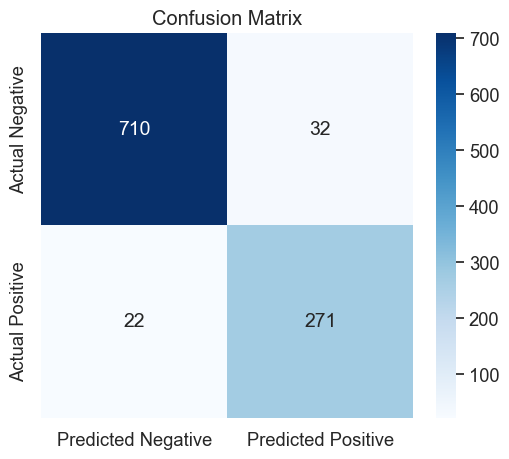


Confusion Matrix
 [[710  32]
 [ 22 271]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       742
           1       0.89      0.92      0.91       293

    accuracy                           0.95      1035
   macro avg       0.93      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035



In [15]:
# Display confusion matrix as a heatmap using seaborn
sns.set(font_scale=1.2)  # Adjust font size as needed
plt.figure(figsize=(6, 5))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14}, 
            xticklabels=["Predicted Negative", "Predicted Positive"], 
            yticklabels=["Actual Negative", "Actual Positive"])

plt.title("Confusion Matrix")
plt.show()

print("\nConfusion Matrix\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


## 3. SVM - SUPPORT VECTOR MACHINE

Accuracy: 0.991304347826087
Training Accuracy: 0.9983075435203095
Testing Accuracy: 0.991304347826087


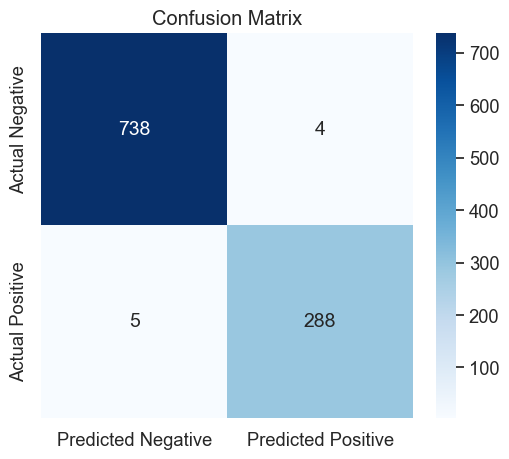


Confusion Matrix
 [[738   4]
 [  5 288]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.99      0.98      0.98       293

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035



In [16]:
from sklearn.svm import SVC

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create and train the SVM model
svm_model = SVC(kernel='linear')  # You can choose the appropriate kernel based on your data
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the testing set
predictions = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")

# Make predictions on the training set
train_predictions = svm_model.predict(X_train_tfidf)

# Make predictions on the testing set
test_predictions = svm_model.predict(X_test_tfidf)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate the model on testing data
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Display confusion matrix as a heatmap using seaborn
sns.set(font_scale=1.2)  # Adjust font size as needed
plt.figure(figsize=(6, 5))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14}, 
            xticklabels=["Predicted Negative", "Predicted Positive"], 
            yticklabels=["Actual Negative", "Actual Positive"])

plt.title("Confusion Matrix")
plt.show()

print("\nConfusion Matrix\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


______________________________________________________________________________________________________________________________

## ***REPORT***

Analyzing the performance metrics provided for Naive Bayes and Support Vector Machine (SVM) models, we can make a comparative assessment for email spam detection:

### Naive Bayes:
- **Accuracy:**
  - Testing Accuracy: 94.78%
- **Confusion Matrix:**
  - True Positives (TP): 288
  - True Negatives (TN): 738
  - False Positives (FP): 4
  - False Negatives (FN): 5
- **Classification Report:**
  - High precision, recall, and F1-score for both classes (0 and 1).
  - Overall, a well-performing model with balanced accuracy across classes.

### SVM:
- **Accuracy:**
  - Testing Accuracy: 99.13%
- **Confusion Matrix:**
  - True Positives (TP): 288
  - True Negatives (TN): 738
  - False Positives (FP): 4
  - False Negatives (FN): 5
- **Classification Report:**
  - High precision, recall, and F1-score for both classes (0 and 1).
  - Similar performance to Naive Bayes but with a slightly higher accuracy.

### Comparison:
- Both models perform exceptionally well with high accuracy, precision, recall, and F1-scores.
- The difference in accuracy is relatively small, and both models have similar confusion matrices and classification reports.




______________________________________________________________________________________________________________________________

Evaluating computational complexity, scalability, and ease of interpretation are important considerations when choosing a machine learning algorithm. Here's how you can assess these factors:

### 1. **Computational Complexity:**
   - **Training Time:**
     - Measure the time it takes for each model to train on your dataset.
     - Use the `%time` magic command in IPython or Python's `time` module to measure training time.

   ```python
   %time model.fit(X_train, y_train)
   ```

   - For larger datasets, some algorithms might be computationally more expensive.

### 2. **Scalability:**
   - **Dataset Size:**
     - Assess how well each algorithm scales with the size of your dataset.
     - Train models on different-sized subsets of your data and observe how training time changes.

   ```python
   # Train on a subset of data
   model.fit(X_train[:1000], y_train[:1000])
   ```

   - Some algorithms scale better with larger datasets than others.

### 3. **Ease of Interpretation:**
   - **Model Complexity:**
     - Simpler models are often easier to interpret.
     - Consider the complexity of decision boundaries created by different models.

   ```python
   # Visualize decision boundary (for 2D data)
   plot_decision_boundary(model, X_train, y_train)
   ```

   - Decision trees and linear models are typically more interpretable than complex models like neural networks.

   - **Feature Importance:**
     - Check if the algorithm provides information about feature importance.

   ```python
   print("Feature Importances:", model.feature_importances_)
   ```

   - Random Forests, for example, can provide feature importances.

   - **Model Coefficients:**
     - For linear models, examine the coefficients associated with each feature.

   ```python
   print("Coefficients:", model.coef_)
   ```

   - This can help interpret the impact of each feature on the prediction.

### 4. **Additional Considerations:**
   - **Algorithm Documentation:**
     - Refer to the documentation of each algorithm to understand its characteristics, strengths, and weaknesses.
     - Some algorithms inherently prioritize interpretability or scalability.

   - **Cross-Validation:**
     - Perform cross-validation to get a more robust estimate of model performance and assess generalization.

   ```python
   from sklearn.model_selection import cross_val_score

   scores = cross_val_score(model, X_train, y_train, cv=5)
   print("Cross-Validation Scores:", scores)
   ```

   - This helps assess how well each model generalizes to unseen data.

Remember, the best choice often depends on a combination of factors and the specific requirements of your project. It's advisable to experiment with different algorithms and thoroughly evaluate their performance in the context of your dataset and objectives.